# Group Members:

  *    Beilin Ye 21053851
  *    Harneet kaur 20988034
  *    Lida Ghasemi 21052487

# **Introduction**

Insurance companies face a significant challenge in ensuring their profitability while providing adequate coverage to policyholders. One of the critical aspects of this challenge is pricing car insurance policies appropriately, which involves understanding the factors that impact the probability of car accidents and the resulting claim amounts. For instance, the age of the insured vehicle (auto year) has been identified as a crucial factor, as older cars tend to incur higher costs in accidents. As a result, insurance companies adjust their pricing strategies to charge higher premiums for older vehicles, reflecting the increased risk.


This project aims to investigate the factors influencing the total claim amount from customers in the event of an accident by analyzing two separate datasets
from the year 2018 from different insurance companies. The first dataset includes the following factors: Customer lifetime value, income, monthly premium auto, months since last claim, months since policy inception, number of open complaints, and number of Policies. The second dataset encompasses factors such as months as customer, policy state, policy deductible, policy annual premium, umbrella limit, insured sex, insured education level, incident state, days from bind date, and auto year.


To address this problem, we employ predictive modeling techniques to uncover the relationship between these factors and the total claim amount. Specifically, we implement Linear Regression, Decision Tree, and Naive Bayes models to gain insights into how each factor contributes to the overall claim amount. By evaluating the accuracy of these models, we aim to identify the most effective approach for predicting claim amounts based on the provided datasets.


The results of this study will provide valuable guidance to insurance companies in refining their pricing strategies. Understanding the influence of specific factors on claim amounts will enable companies to categorize car insurance policies effectively, ensuring they charge higher premiums for higher-risk vehicles while maintaining fairness and competitive pricing for their customers. Ultimately, this research will contribute to optimizing insurance companies' profitability and enhancing their ability to provide reliable and affordable coverage to policyholders.


#Claim Amount/Claim Amount Classification Prediction:

**Project Idea**: Predict the total claim amount for insurance claims. Machine Learning Algorithm: Apply regression algorithms such as linear regression, decision trees, NaiveBayes to predict the total claim amount or the claim amount classification (High or Low) based on various features like policyholder information(age, gender, education, etc.), policy information, incident details, and claim-specific variables.

**Literature review - ML application on Auto Insurance Industry**

There are growing trend of using machine learning techniques in the insurance industry, particularly for auto insurance. Logistic Regression, XGBoost, Random Forest, Decision Trees, Naïve Bayes and K-Nearest Neighbors (K-NN) are all commonly used to predict claim occurrence and assess risk factors accurately (Hanafy, Mohamed, and Ruixing Ming. "Machine Learning Approaches for Auto Insurance Big Data."). This particular study found that Random Forest (RF) performed better than the others (Hanafy, Mohamed, and Ruixing Ming. "Machine Learning Approaches for Auto Insurance Big Data.").



Deep learning techniques such as transfer learning-based VGG16 network are also commonly used in the industry for claim prediction (Singh, Ranjodh, Meghna P Ayyar, Tata Venkata Sri Pavan, Sandeep Gosain, and Rajiv Ratn Shah. "Automating Car Insurance Claims Using Deep Learning Techniques.")



Furthermore, machine learning algorithms are also used to handle missing data(Abdelhadi, Shady, Khaled Elbahnasy, and Mohamed Abdelsalam. "A Proposed Model to Predict Auto Insurance Claims Using Machine Learning Techniques."). Currently in the industry, Artificial Neural Network (ANN), Decision Tree, Naïve Bayes, XGBoost are commonly used (Abdelhadi, Shady, Khaled Elbahnasy, and Mohamed Abdelsalam. "A Proposed Model to Predict Auto Insurance Claims Using Machine Learning Techniques.")



Reference:

1) Hanafy, Mohamed, and Ruixing Ming. "Machine Learning Approaches for Auto Insurance Big Data." Risks 9 (2021): 42. DOI: https://doi.org/10.3390/risks9020042

2) Singh, Ranjodh, Meghna P Ayyar, Tata Venkata Sri Pavan, Sandeep Gosain, and Rajiv Ratn Shah. "Automating Car Insurance Claims Using Deep Learning Techniques." Humonics Global Pvt. Ltd., MIDAS Lab, IIIT Delhi.

3) Abdelhadi, Shady, Khaled Elbahnasy, and Mohamed Abdelsalam. "A Proposed Model to Predict Auto Insurance Claims Using Machine Learning Techniques." Department of Information System, Faculty of Commerce & Business Administration, Helwan University, Cairo, Egypt. Journal of Theoretical and Applied Information Technology

## Two datasets used for analysis in this project:
Both datasets are from the year 2018 which focus on US car insurance, and it is essential to acknowledge that publicly available car insurance data is relatively scarce. To ensure the validity of our comparison, we have diligently excluded datasets pertaining to different areas or countries. Additionally, we observed that the datasets serve various purposes, with some specifically targeting car insurance fraud while others aim to study used car values with limited car insurance information.

After an extensive search, we identified these two datasets as the sole sources encompassing US car insurance data, providing valuable insights into policyholders, geographic information, incident details (features), and the all-important total claim amounts (our target class for study and prediction). Given the modest data volume at our disposal, we have opted to employ k-fold cross-validation in all algorithms. This approach aids in maximizing the information utilization, enhancing the reliability of our analyses despite the limited dataset size.

dataset 1: https://www.kaggle.com/code/madhushreesannigrahi/jenks-natural-breaks-and-k-means-clustering/data

dataset 2: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

## Data Cleaning and Exploration



1.   Part 1: Basic Information about Data
We start by importing the insurance claims data from the provided CSV file.
2. To understand the size of the dataset, we calculate the number of rows (instances) and columns (features)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Part 1: basic information about data

# Import data
import pandas as pd
df1= pd.read_csv('drive/My Drive/project datasets/insurance_claims.csv')

# 1.1 Getting the number of instances and features
print(df1.shape)
print(df1.ndim)
print(df1.info())
print(df1.describe())

(1000, 40)
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insure

In [ ]:
nan_values_per_column = df1.isnull().sum()

print(nan_values_per_column)

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

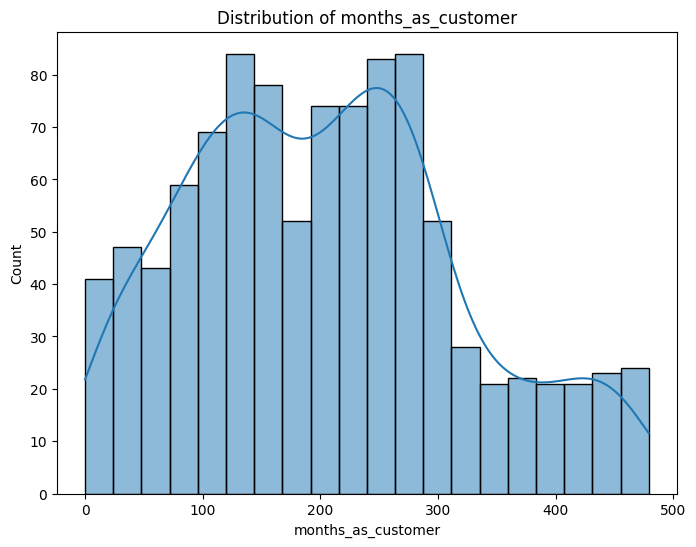

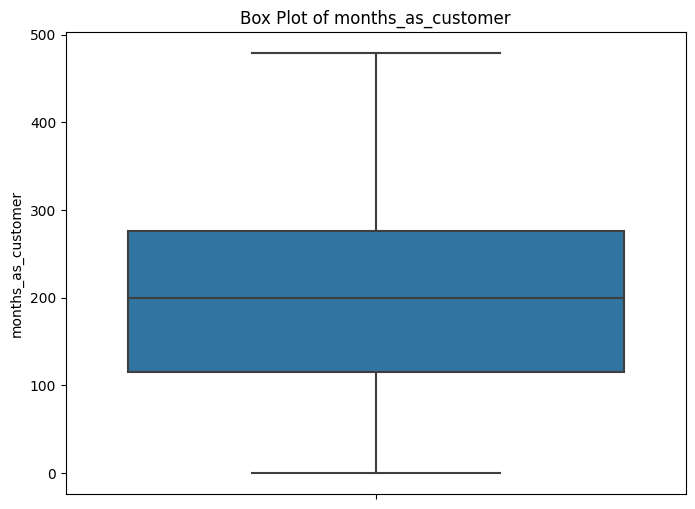

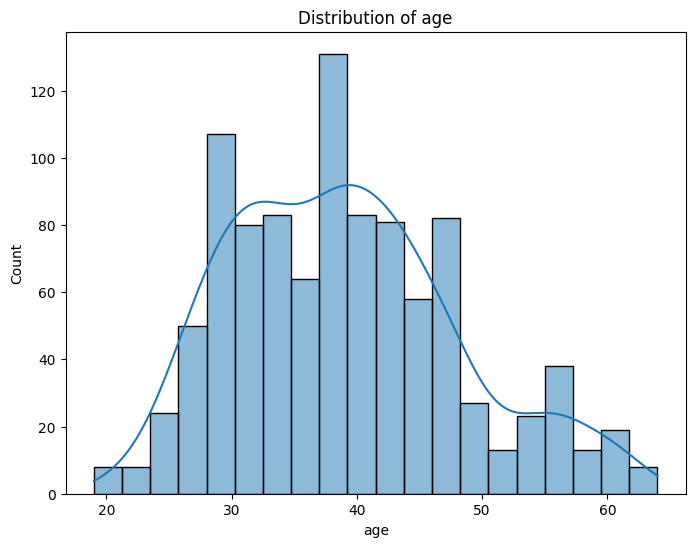

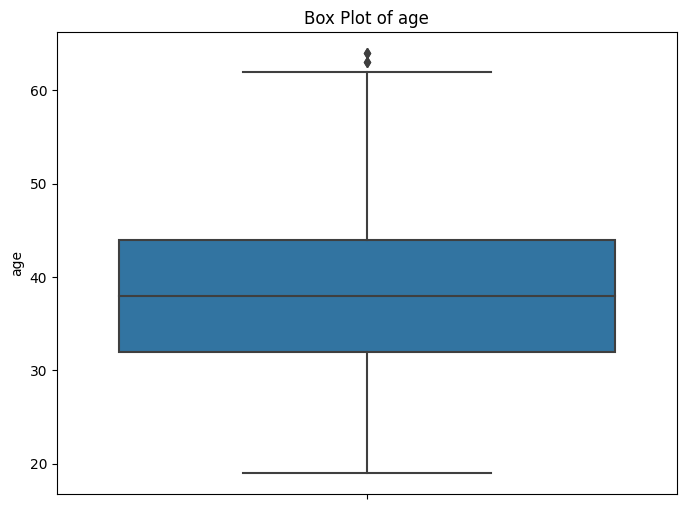

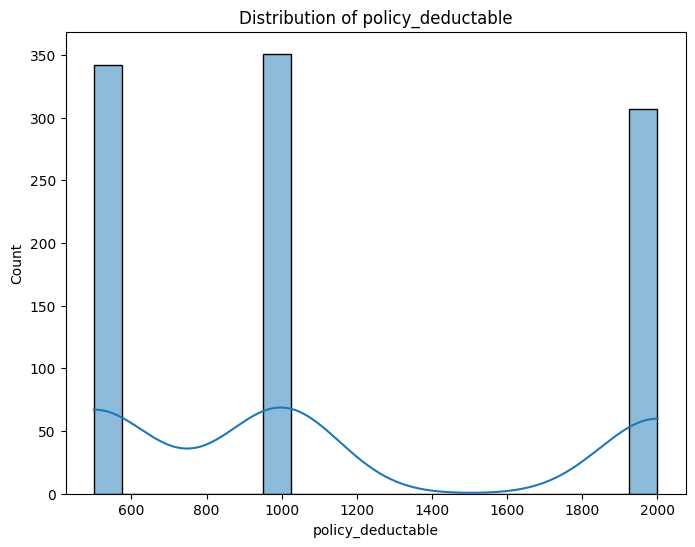

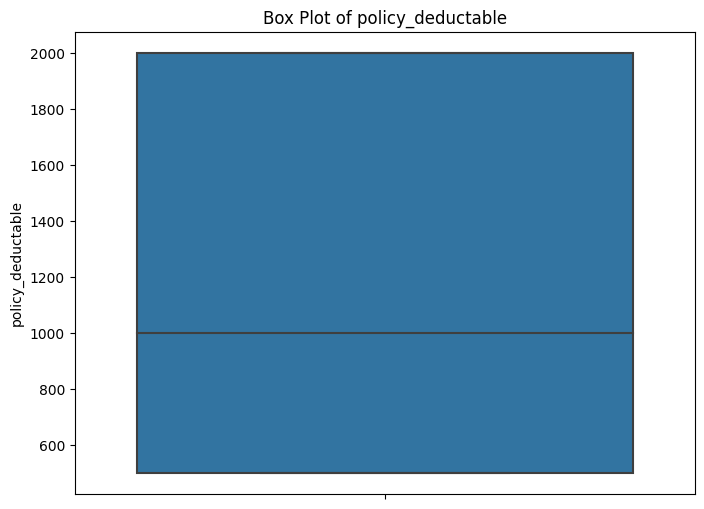

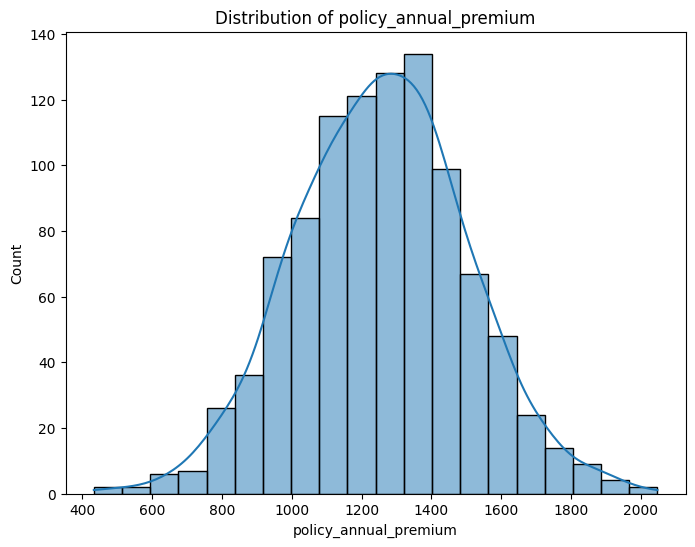

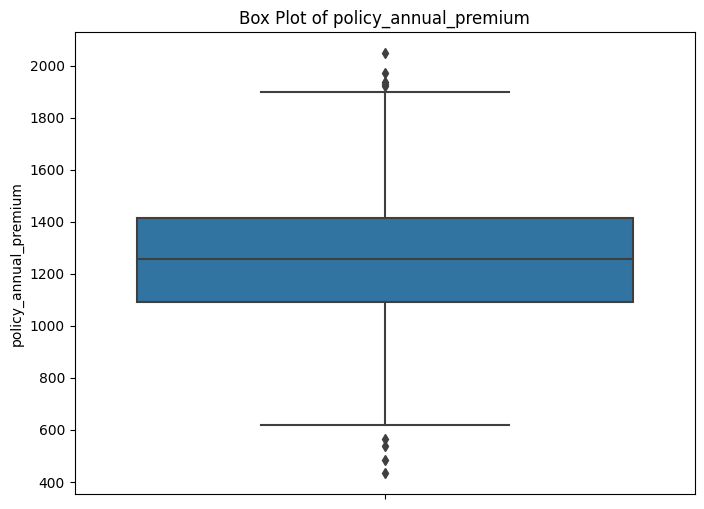

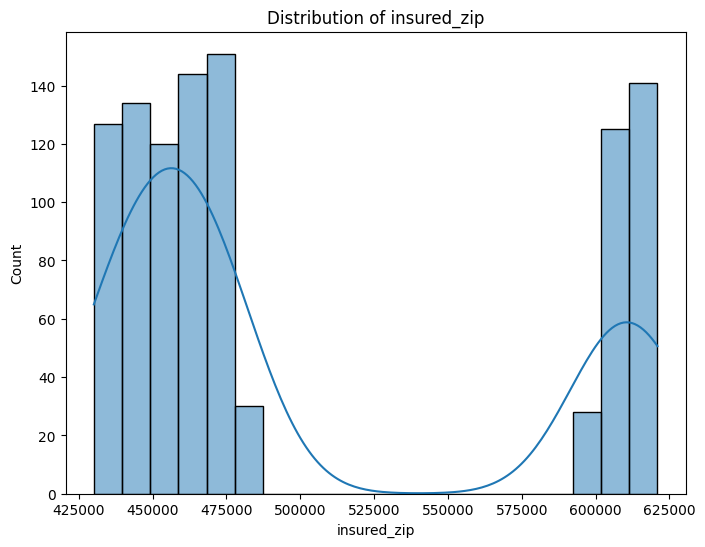

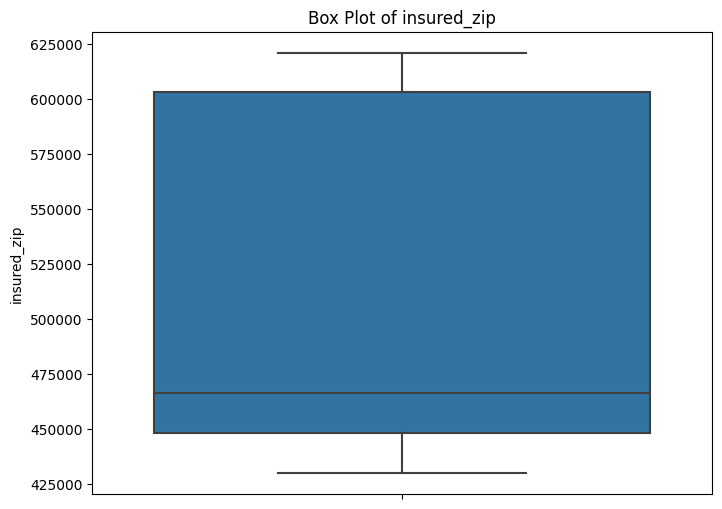

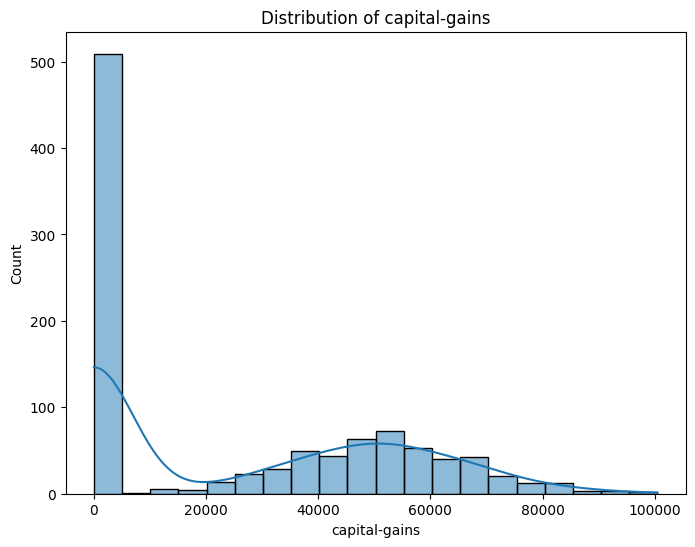

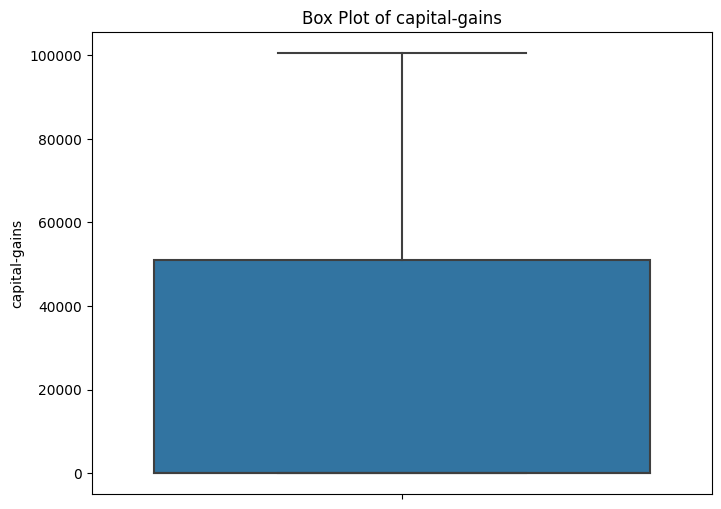

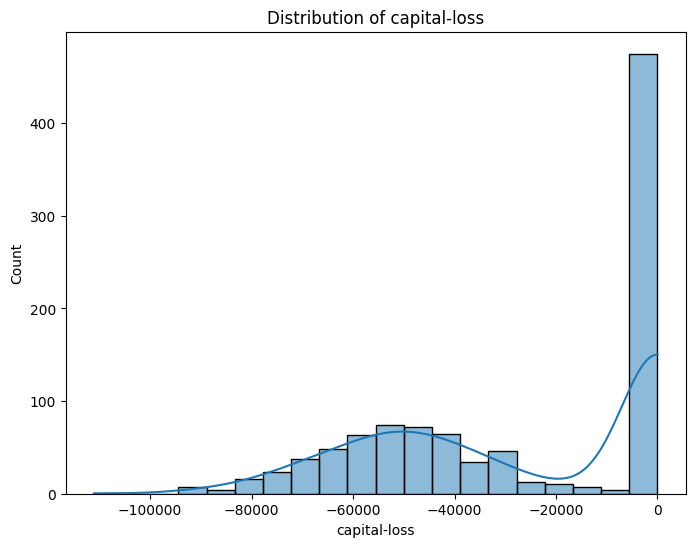

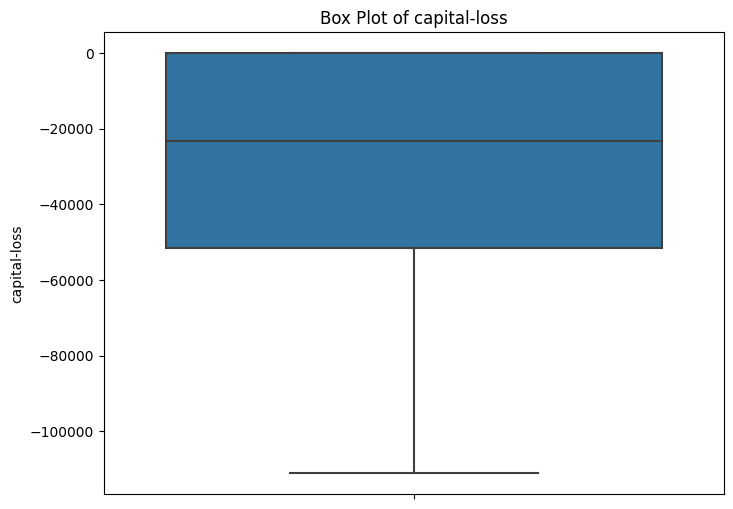

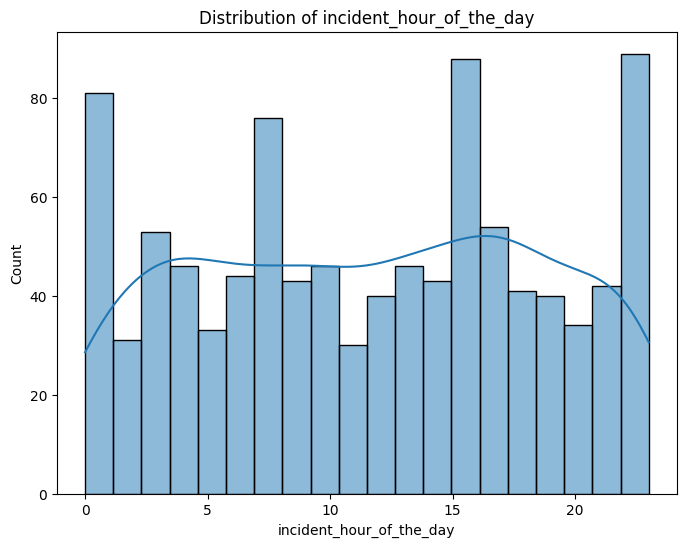

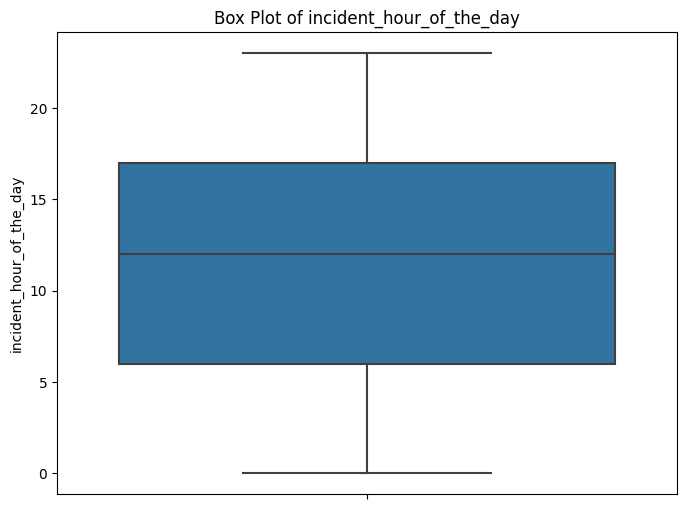

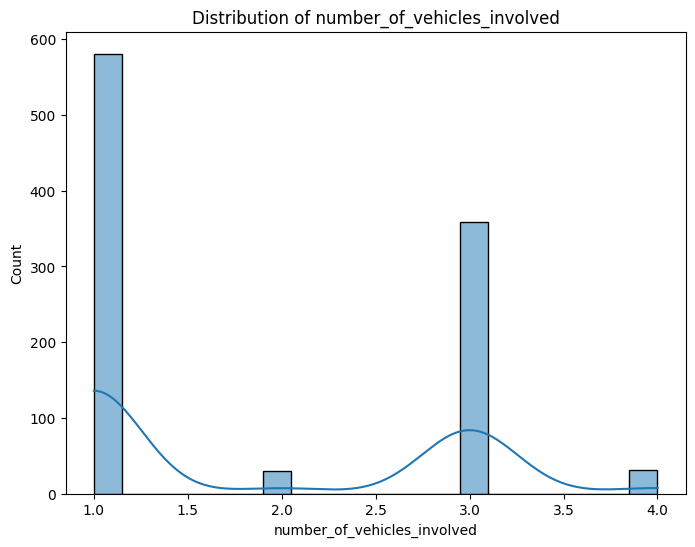

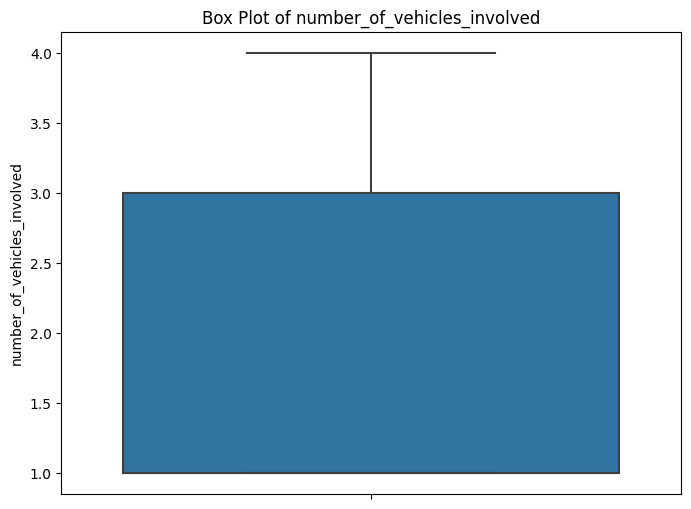

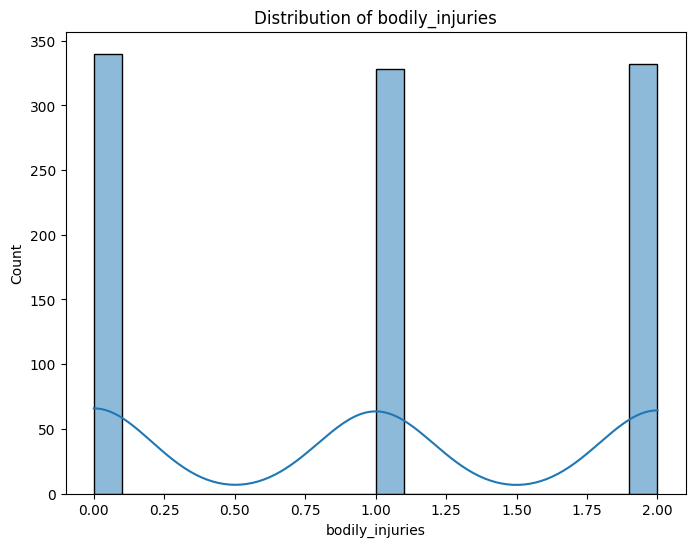

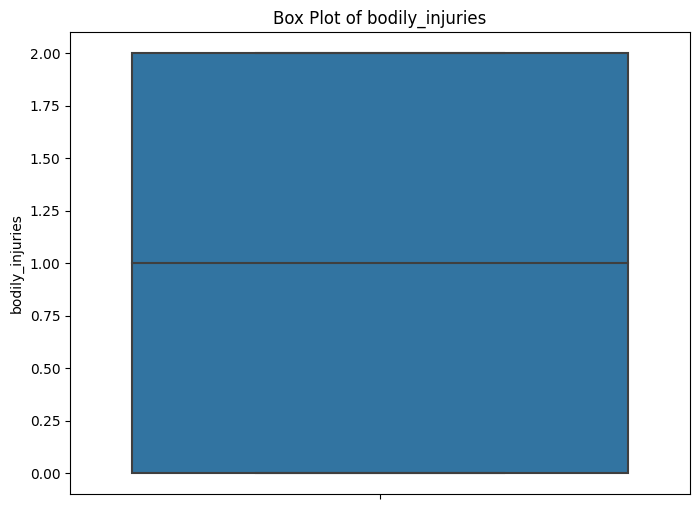

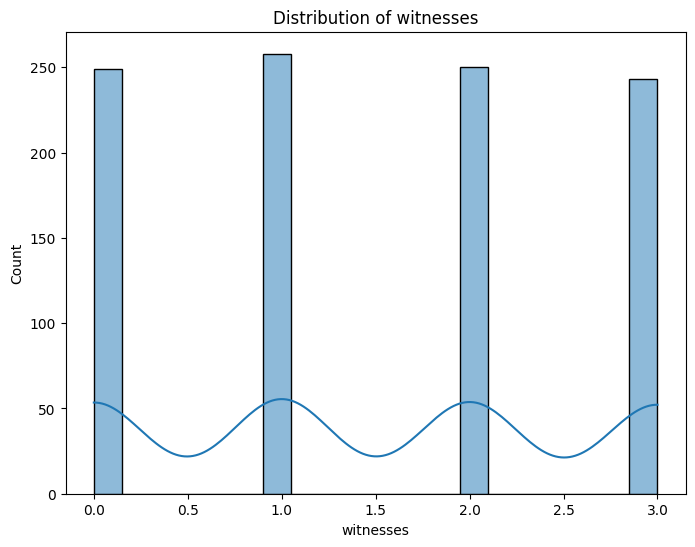

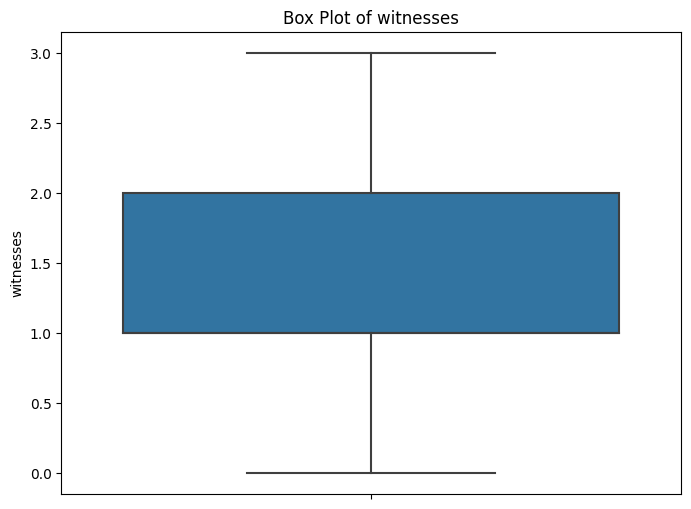

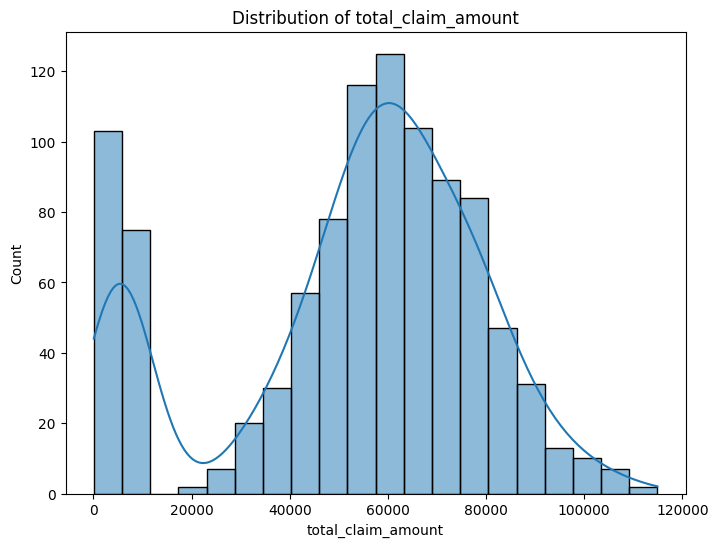

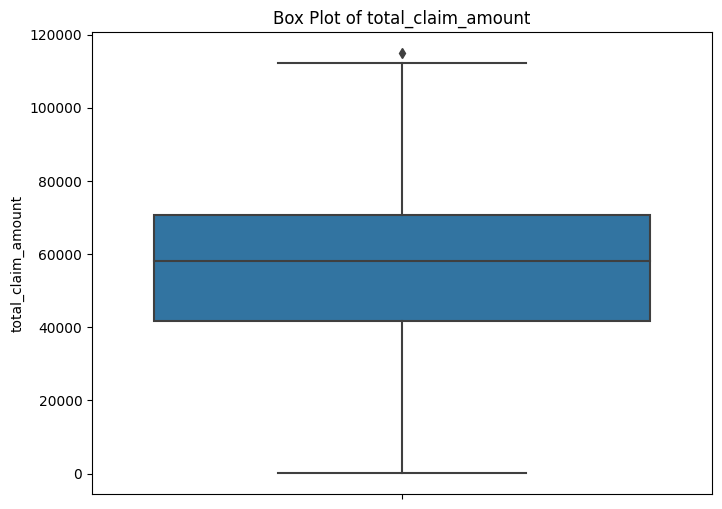

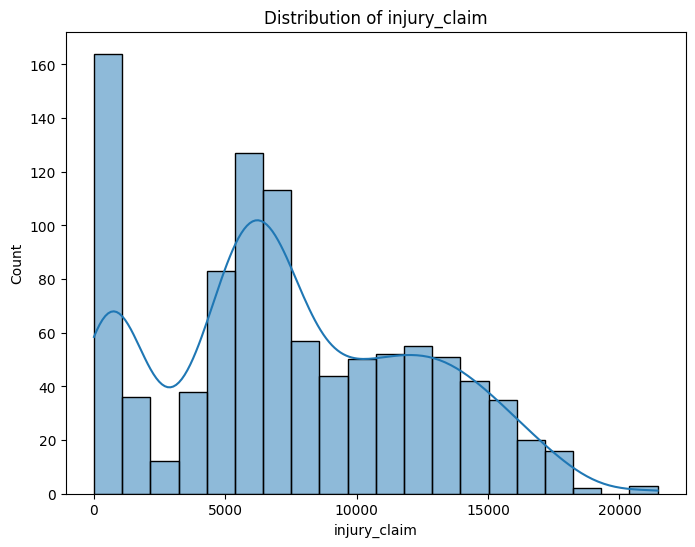

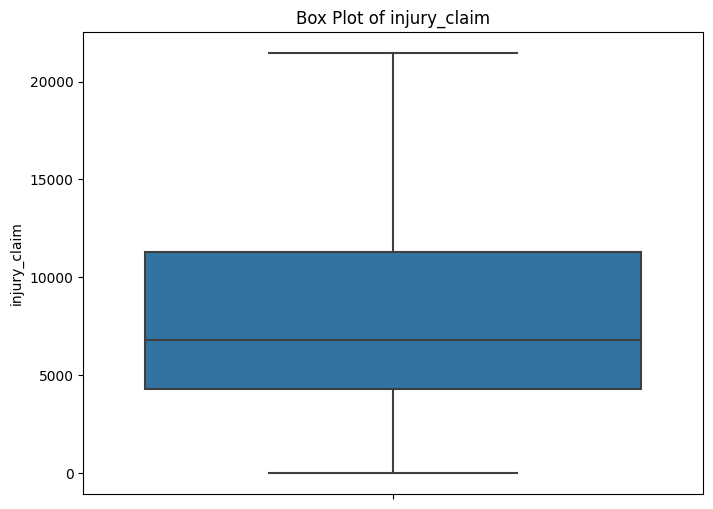

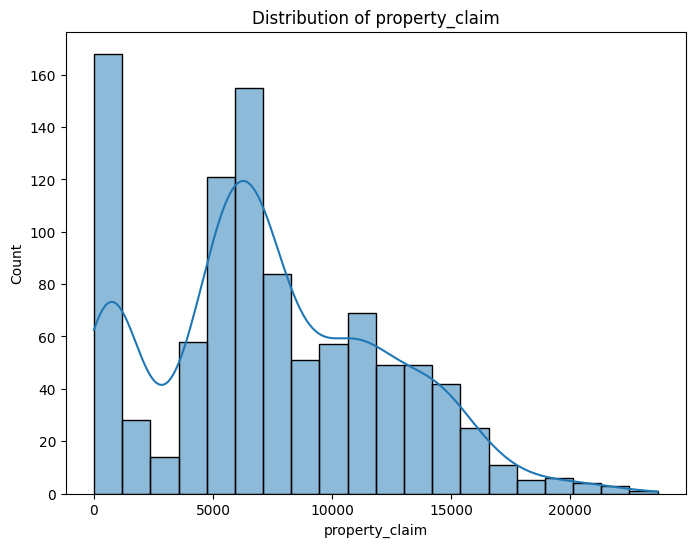

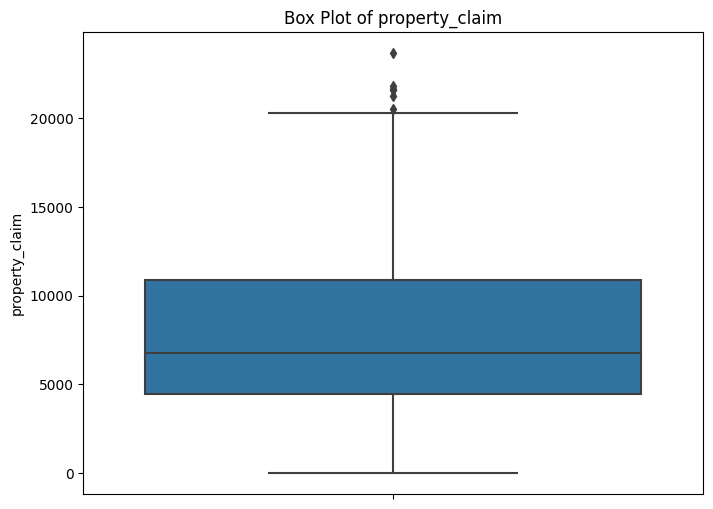

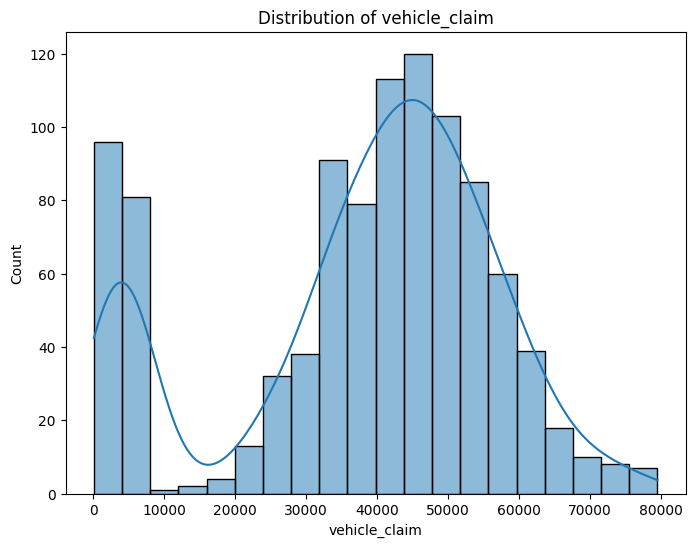

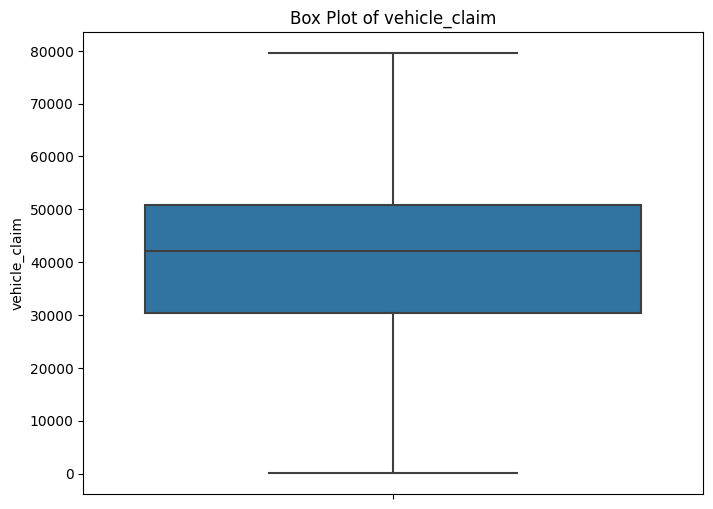

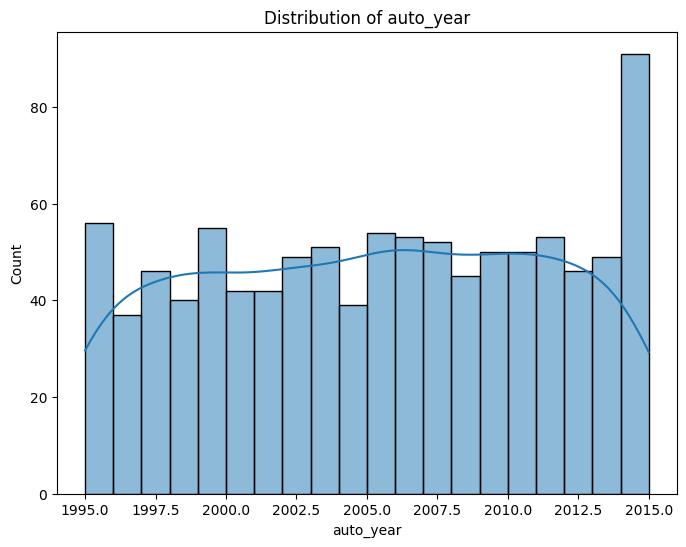

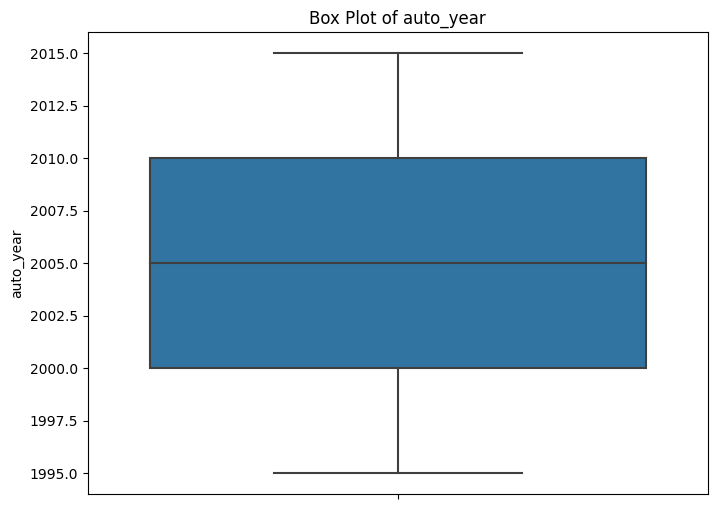

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric Features
numeric_features = df1.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_features:
    if feature != '_c39' and feature!='policy_number' and feature!='umbrella_limit':
        # Plot histogram for numeric features
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df1, x=feature, bins=20, kde=True)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.show()

        # Box plot for numeric features
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df1, y=feature)
        plt.title(f"Box Plot of {feature}")
        plt.ylabel(feature)
        plt.show()



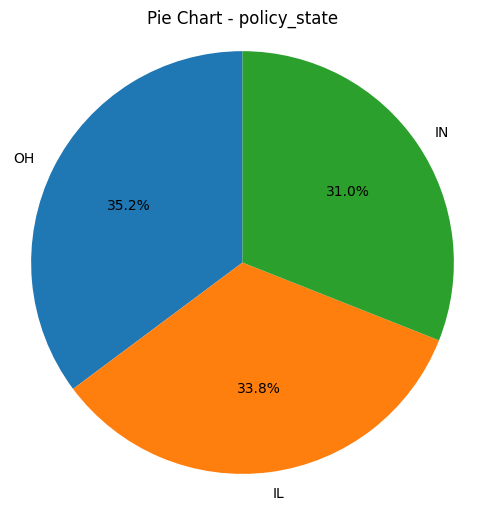

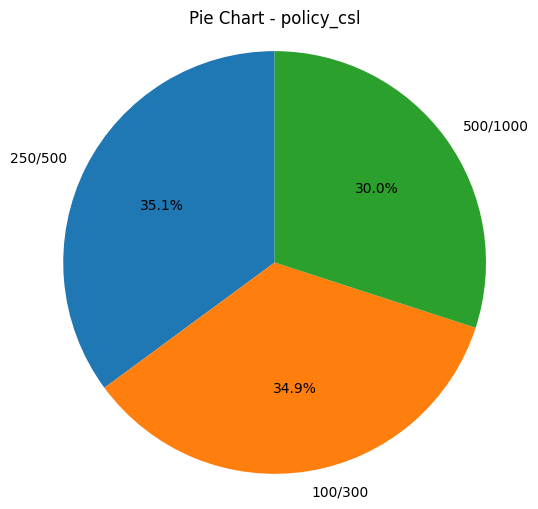

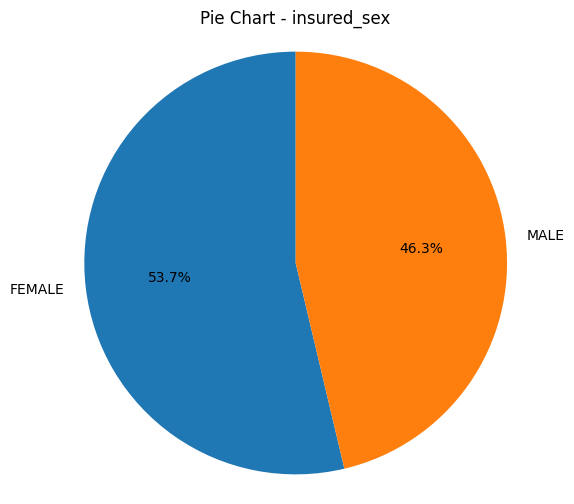

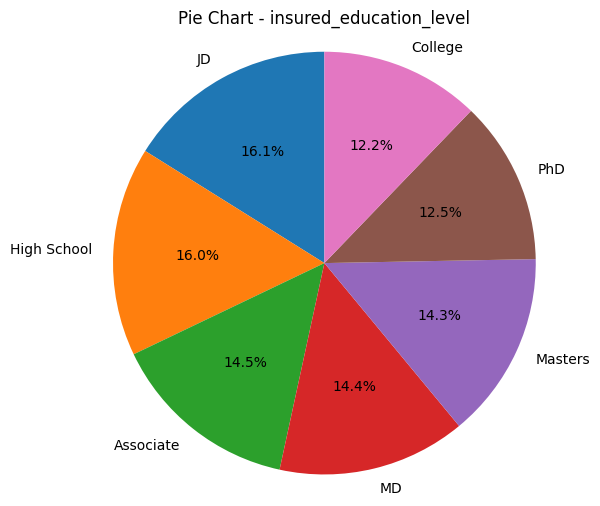

In [ ]:
categorical_features_for_pie = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level']

for feature in categorical_features_for_pie:
    # Calculate value counts for the feature
    feature_counts = df1[feature].value_counts()

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart - {feature}")
    plt.axis('equal')
    plt.show()

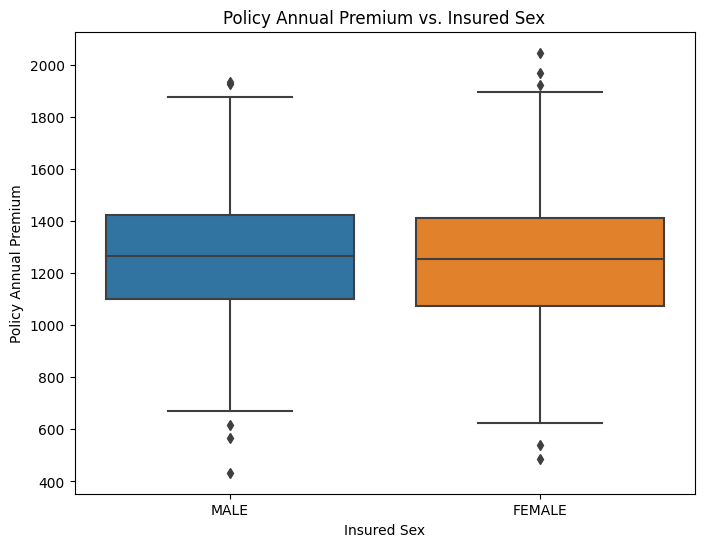

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='insured_sex', y='policy_annual_premium')
plt.title("Policy Annual Premium vs. Insured Sex")
plt.xlabel("Insured Sex")
plt.ylabel("Policy Annual Premium")
plt.show()

In [ ]:
df1 = df1.drop('_c39',axis = 1)

# Further Analysis of Features

## Finding the correlation between variables
The heatmap visually represents the correlation between the numerical columns in the DataFrame. By visualizing the correlation heatmap, we can quickly identify the strength and direction of relationships between pairs of numerical columns in df2. Positive values indicate positive correlation (both variables increase or decrease together), negative values indicate negative correlation (one variable increases while the other decreases), and values near zero indicate weak or no correlation. This visualization is helpful in understanding the interdependence of variables and can provide insights about multicollinearity occurance when two or more independent variables are highly correlated with each other, making it challenging to distinguish their individual effects on the dependent variable. This can affect the stability and interpretability of regression models.

<ipython-input-29-ff67c9dd41cf>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


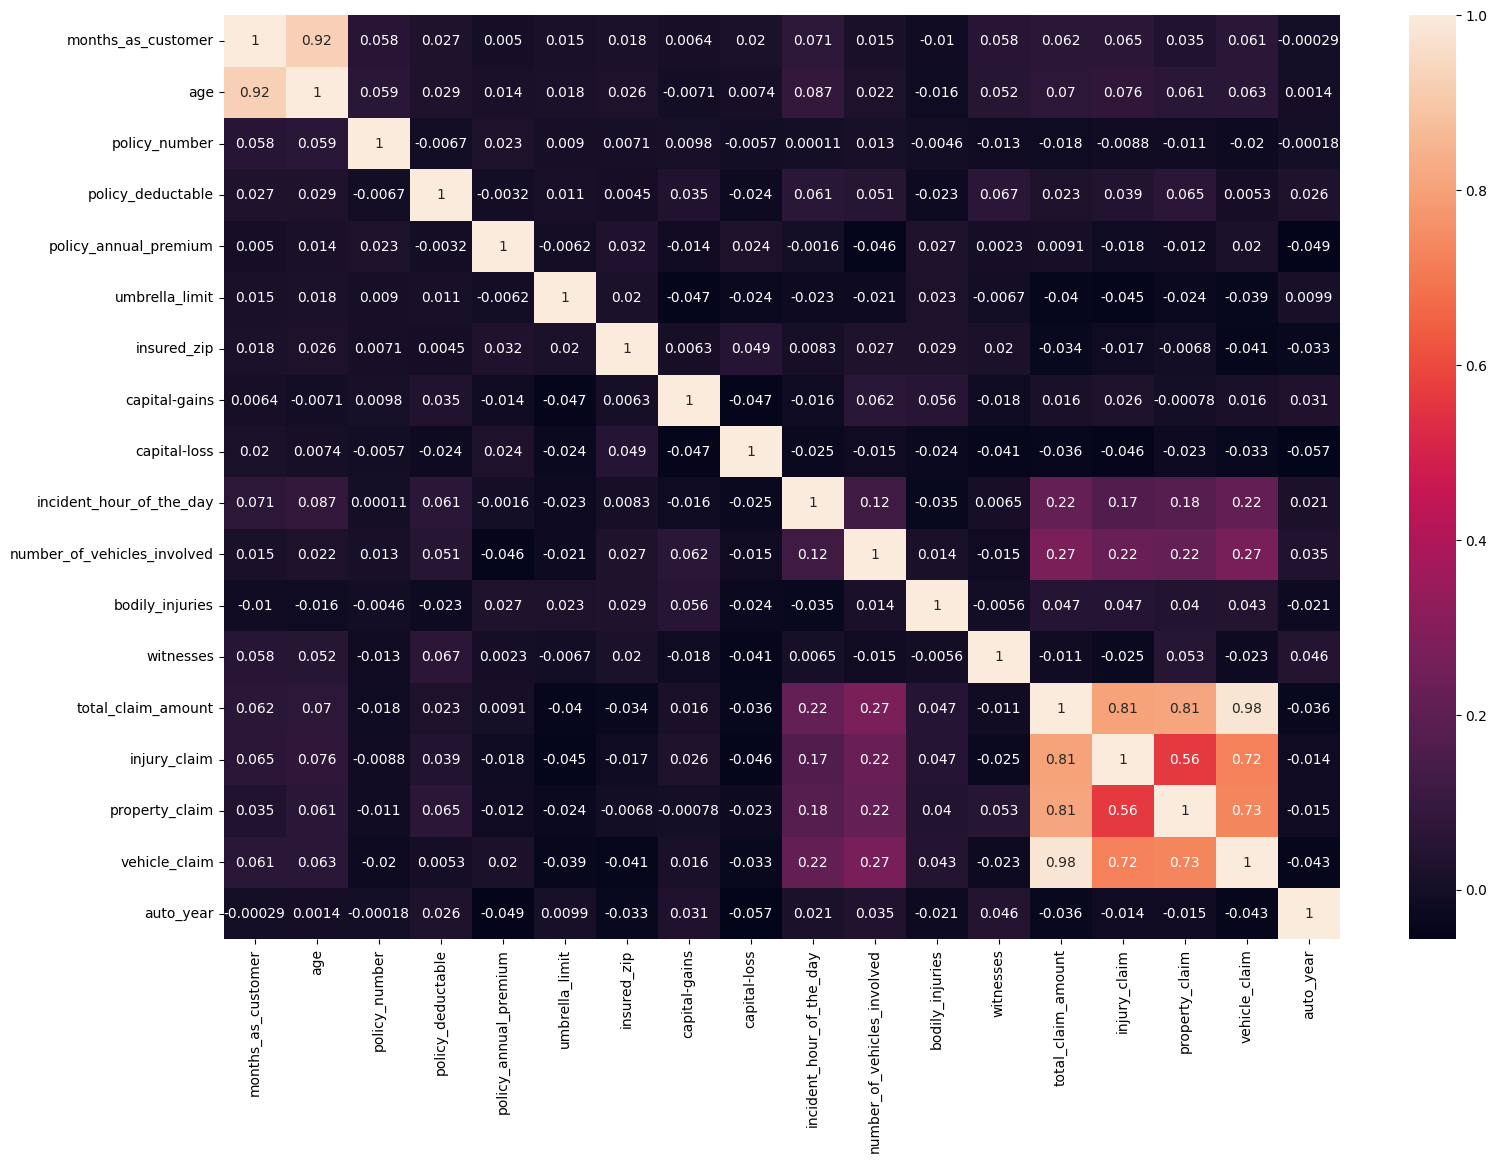

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,12))

sns.heatmap(df1.corr(),annot=True)
plt.show()

## Correlation of features with total claim amount

<ipython-input-30-2b5bab347907>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_true_claim = df2.corr()['total_claim_amount']


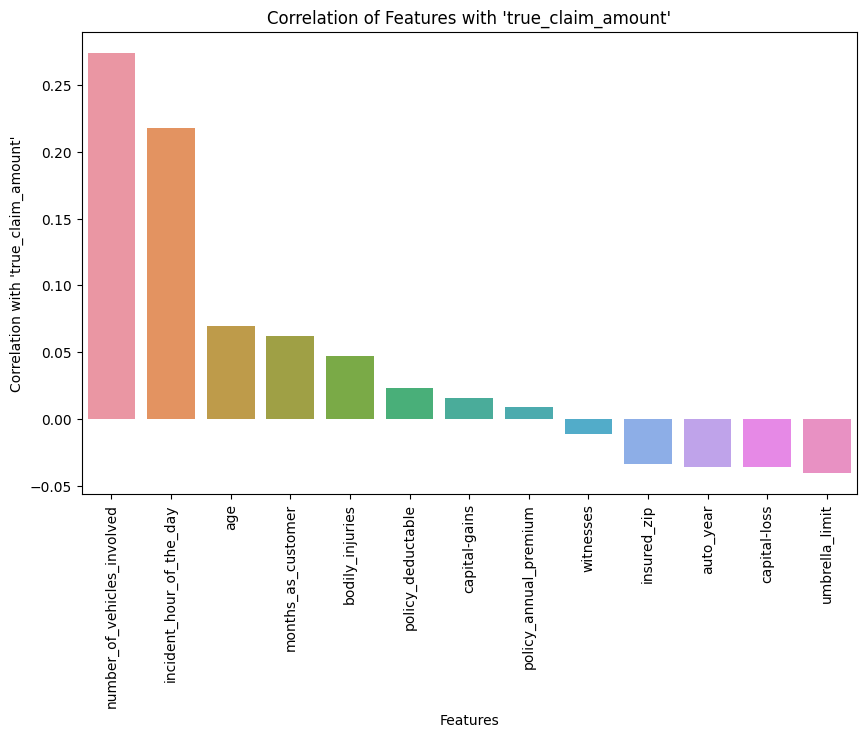

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of every column with 'true_claim_amount'
df2 = df1.drop([ "vehicle_claim","property_claim","injury_claim", "policy_number"], axis=1)
correlation_with_true_claim = df2.corr()['total_claim_amount']
# print(correlation_with_true_claim)
correlation_with_true_claim.drop('total_claim_amount',inplace = True)
# Sort the correlation values in d,escending order
sorted_correlation = correlation_with_true_claim.sort_values(ascending=False)


# Plot the bar graph of correlation values with 'true_claim_amount'
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with 'true_claim_amount'")
plt.title("Correlation of Features with 'true_claim_amount'")
plt.show()


## Histogram Analysis
Based on the histogram analysis, we observe that the "total_claim_amount" feature is significantly influenced by three main factors: "number_of_vehicles_involved" accounts for approximately 25% impact, followed by "Incident_hour_of_the_Day" with approximately 22% impact, and finally, "age" contributes around 7% to the total impact on the "total_claim_amount" feature. These findings indicate that these specific variables play a crucial role in determining the variation in the "total_claim_amount" in the dataset.

## Business Insights from Histogram Analysis

The two most impactful features, accounting for about half of the impact in the dataset, surprisingly do not stem from the nature of the policyholder but rather from the nature of the accidents themselves. These insights provide valuable implications for the insurance industry:

Accurate Claim Prediction: By utilizing the accident report, insurance companies can predict the expected claim amount, enabling faster and more accurate approximations.

Fraud Analysis: The accident report can be instrumental in determining the legitimacy of a claim amount, facilitating effective fraud analysis.

Underwriting Assessment: Examining policyholders' driving habits, such as driving patterns and peak hours, allows insurers to better understand risks and tailor insurance policies accordingly.

Overall, these findings demonstrate the importance of considering specific accident-related variables and utilizing accident reports for more informed decision-making in the auto insurance industry.


Regarding policyholder information, age and customer tenure are the two primary factors of significance. When conducting underwriting assessments, it is essential to accord these two features greater weightage to effectively categorize policyholders and determine the appropriate premium for the upcoming year.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out the categorical columns from df1
categorical_columns = df1.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


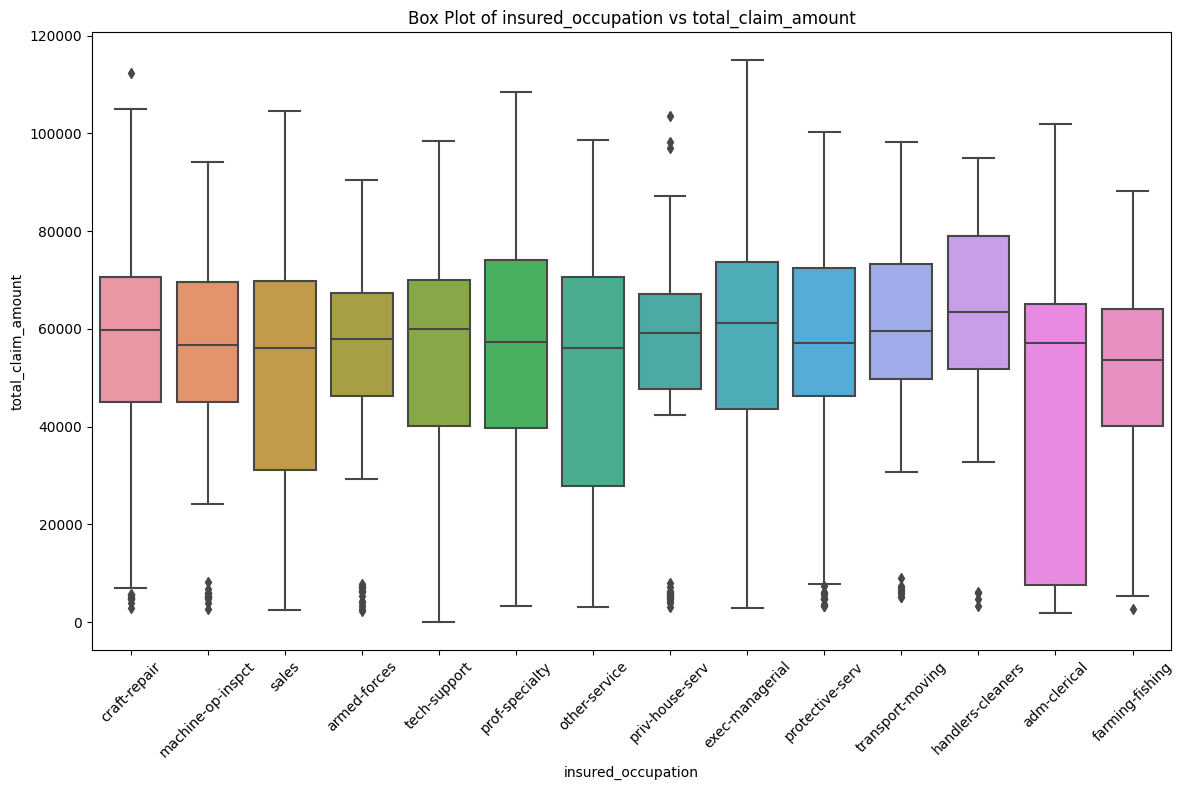

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the box plot for 'policy_bind_date' against total_claim_amount
plt.figure(figsize=(12, 8))

sns.boxplot(x='insured_occupation', y='total_claim_amount', data=df1)
plt.title('Box Plot of insured_occupation vs total_claim_amount')
plt.xlabel('insured_occupation')
plt.ylabel('total_claim_amount')

# Rotate x-axis labels to avoid congestion
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## The box plot analysis : insured_occupation VS total_claim_amount
It sheds light on the relationship between different occupational categories and their corresponding insurance claim amounts. Notably, individuals in clerical jobs tend to file claims for lower amounts, typically ranging from 20,000 to 50,000 dollars. In contrast, people in occupations such as transport-moving, executive-managerial, and tech support show higher claim amounts. From this analysis, we can infer that the nature of the occupation might play a significant role in determining the level of insurance claims. Occupations that involve higher risks or responsibilities, such as transport-moving or executive-managerial roles, may experience more substantial losses, leading to higher claim amounts. On the other hand, clerical jobs, which generally entail administrative or office-based tasks, might encounter fewer risk factors and, therefore, result in lower insurance claims.

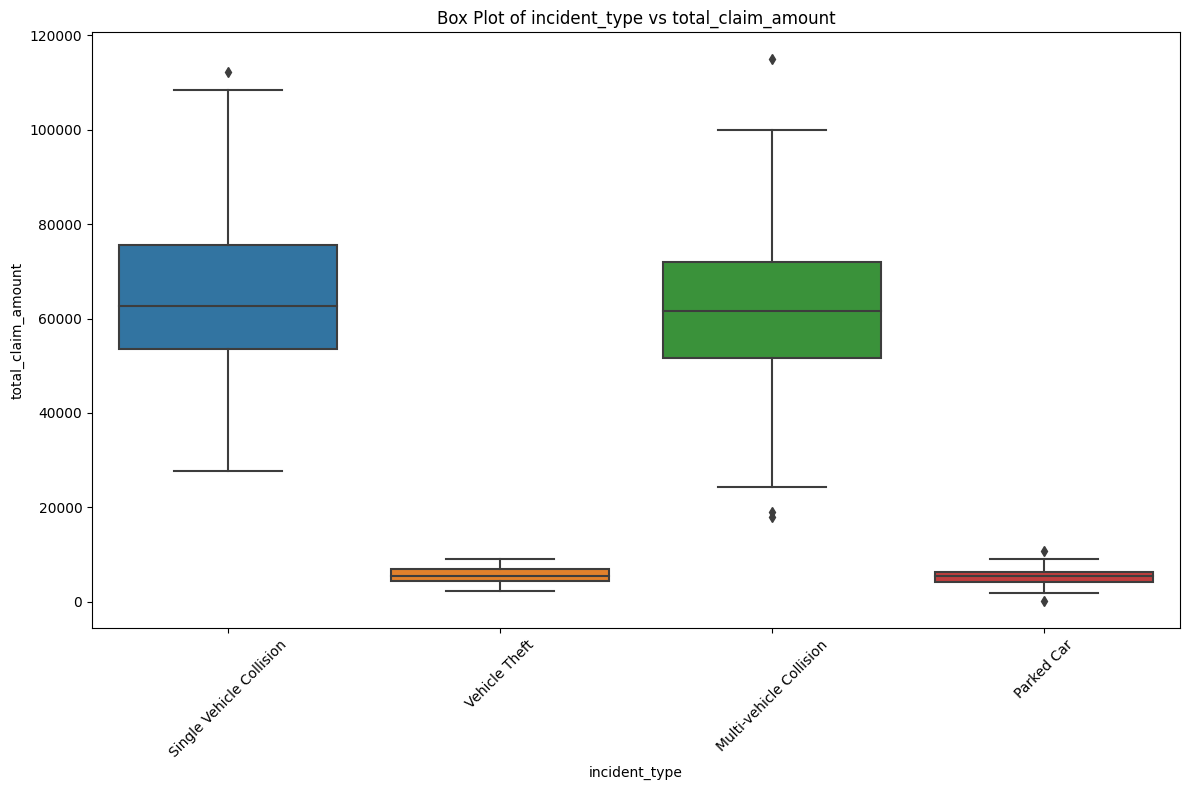

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the box plot for 'INCIDENT TYPE' against total_claim_amount
plt.figure(figsize=(12, 8))

sns.boxplot(x='incident_type', y='total_claim_amount', data=df1)
plt.title('Box Plot of incident_type vs total_claim_amount')
plt.xlabel('incident_type')
plt.ylabel('total_claim_amount')

# Rotate x-axis labels to avoid congestion
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## Box plot analysis incident_type VS total_claim_amount
The above box plot analysis reveals valuable insights into how incident types impact the total_claim_amount. Notably, incidents like vehicle theft and parked car are associated with lower claim amounts, suggesting that these incidents generally result in less severe damages or losses. On the other hand, collisions, such as single vehicle collision and multi-vehicle collision, show a higher contribution to claim amounts, indicating that they tend to lead to more significant and costly damages.

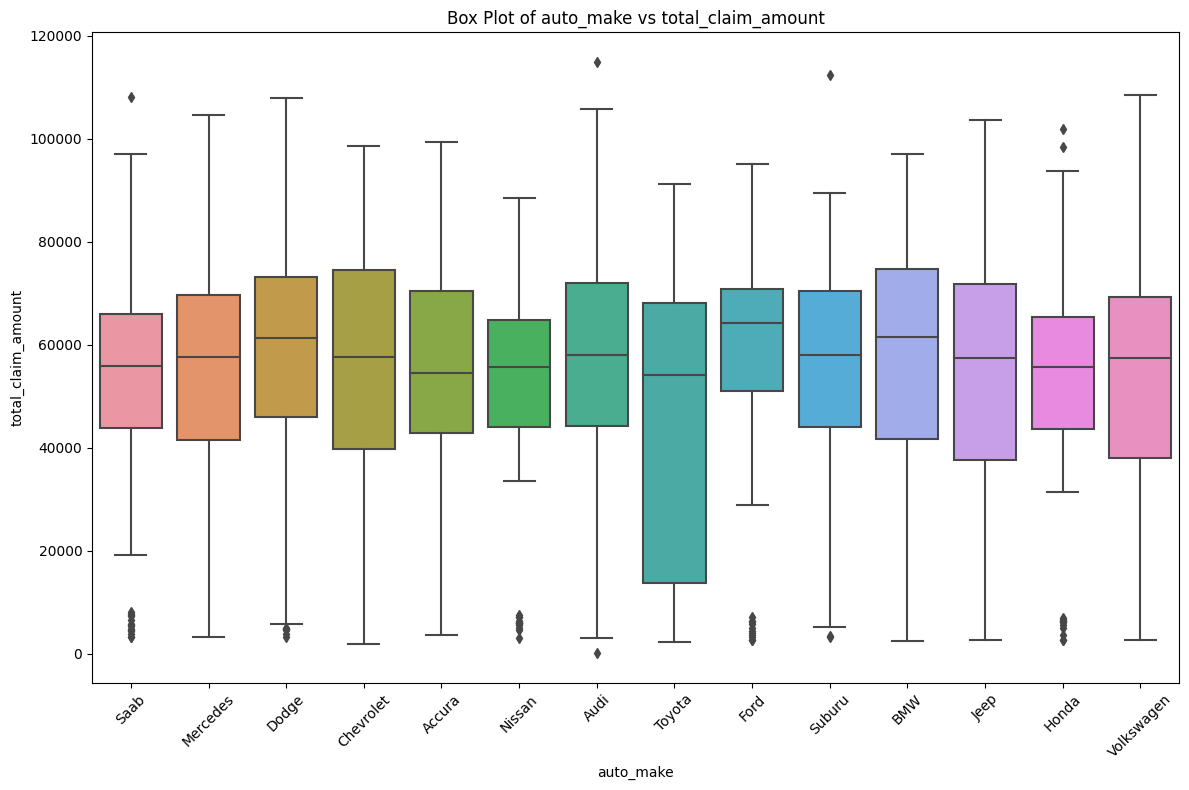

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the box plot for 'policy_bind_date' against total_claim_amount
plt.figure(figsize=(12, 8))

sns.boxplot(x='auto_make', y='total_claim_amount', data=df1)
plt.title('Box Plot of auto_make vs total_claim_amount')
plt.xlabel('auto_make')
plt.ylabel('total_claim_amount')

# Rotate x-axis labels to avoid congestion
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## Box plot analysis auto_make VS total_claim_amount
The box plot analysis reveals the relationship between the car make 'toyota' and the corresponding insurance claim amounts. From the box plot, it can be observed that cars with the make 'toyota' tend to have the least insurance claims compared to other car makes.

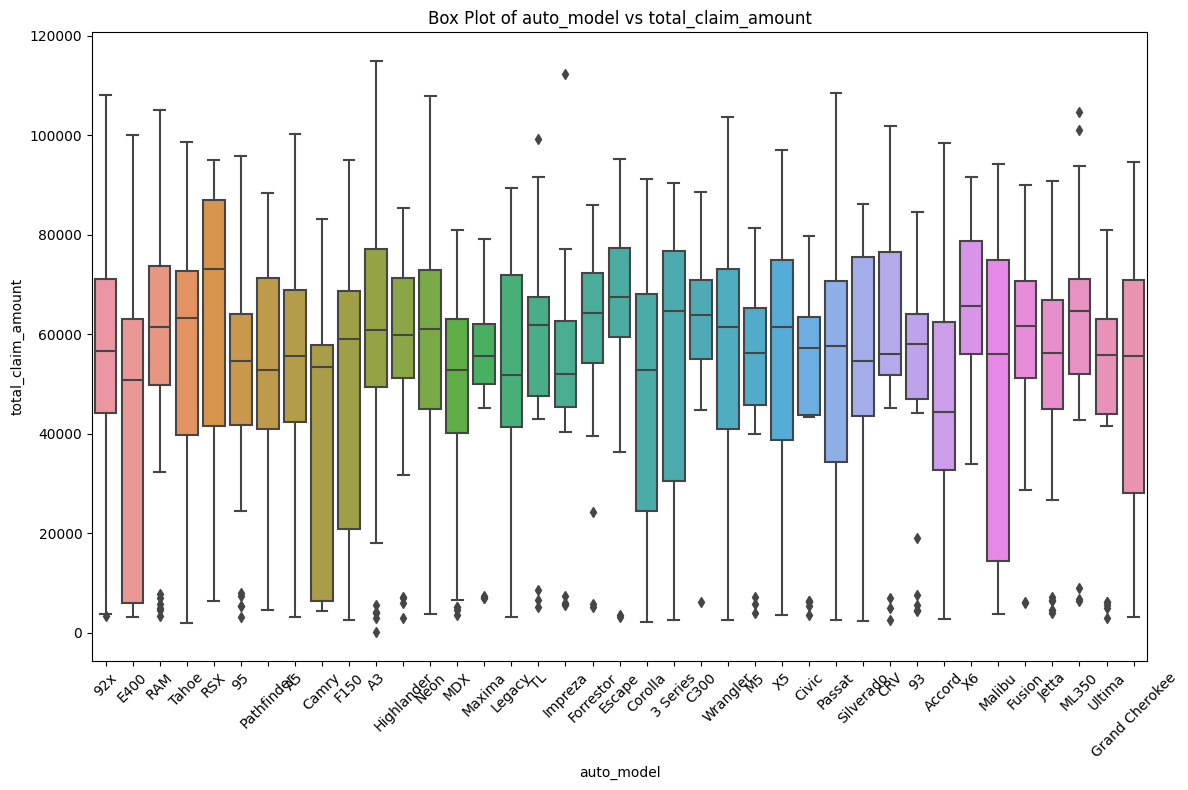

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the box plot for 'auto model' against total_claim_amount
plt.figure(figsize=(12, 8))

sns.boxplot(x='auto_model', y='total_claim_amount', data=df1)
plt.title('Box Plot of auto_model vs total_claim_amount')
plt.xlabel('auto_model')
plt.ylabel('total_claim_amount')

# Rotate x-axis labels to avoid congestion
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## Box plot analysis auto_model VS total_claim_amount

Certain models, namely E400, Camry, and Malibu, exhibit lower total claim amounts. Given the extensive diversity of models within both the dataset and the market, drawing definitive conclusions becomes challenging. Nevertheless, this presents an opportunity for future research through a dedicated study to investigate the distinguishing features of these models that contribute to fewer claims. By generalizing the findings, we can derive valuable insights to enhance predictive capabilities in the domain of auto insurance.

# Data Preprocessing
1. **One-Hot Encoding** :The provided code demonstrates the data preprocessing step of one-hot encoding for the given DataFrame. One-hot encoding is applied to convert categorical columns into numerical format, making it suitable for machine learning models
2. **Dropping irrelevant features**: In the below code we drop the target variable (total_claim_amount) , the primary key policy_number and some other features which directly add up to total_claim_amount. This is done to make sure the model performs well and generalises for new data



In [ ]:
import pandas as pd

# Step 1: Select categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns

# Step 2: Apply one-hot encoding using pd.get_dummies
df1_encoded = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

columns_to_drop = ["total_claim_amount", "property_claim", "injury_claim", "policy_number"]
df1_encoded = df1_encoded.drop(columns_to_drop, axis=1).dropna()

#df1_encoded = df1_encoded.drop(["total_claim_amount", "property_claim","injury_claim", "policy_number"], axis=1)
#df1_encoded = df1_encoded.drop(columns_to_drop, axis=1).dropna()

df1_encoded.head()


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
0,328,48,1000,1406.91,0,466132,53300,0,5,1,...,0,0,0,0,0,0,0,0,0,1
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,...,0,0,0,0,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,...,0,0,0,0,1,0,0,0,0,1
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,...,0,1,0,0,0,0,0,0,0,0


# Linear Regression:
 Linear regression is a commonly used algorithm for analyzing the relationship between a dependent variable (in this case, the total claim amount) and independent variables (such as coverage, monthly premium, and number of open complaints).

**steps to perform linear regression model**

**a. Define x and y:**  X is defined as independent variables and y is defined as dependent variable.

**b. Split the dataset:** Split the dataset into training and testing sets.

**c. Train the linear regression model:** Fit the linear regression model to the training data.

**d. Test the model on new dataset:** We will test the model on the testing dataset.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define X (features) and y (target)
# X = df_pca_result
X  = df1_encoded
y = df1['total_claim_amount']


# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error:", mse)
print("R-squared:", r2)


R-squared: 0.9606393713150624


Plot the model

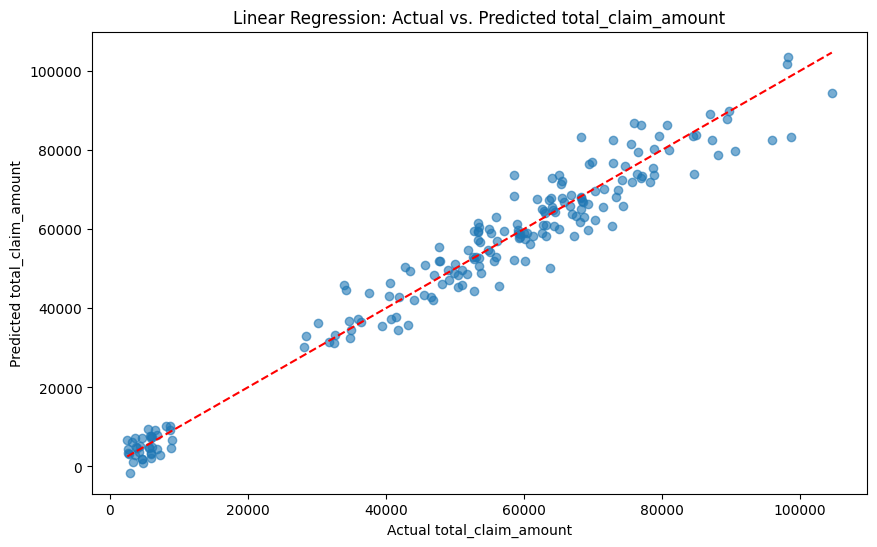

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual total_claim_amount')
plt.ylabel('Predicted total_claim_amount')
plt.title('Linear Regression: Actual vs. Predicted total_claim_amount')

plt.show()


## Coefficient Analysis of the linear regression model:
The code shows the top 20 features with the highest absolute coefficients, indicating their impact on the model's predictions.


In [ ]:
# Get the coefficients of the Linear Regression model
coefficients = regressor.coef_

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame based on the absolute values of coefficients (for magnitude comparison)
feature_importances_df['Absolute Coefficient'] = feature_importances_df['Coefficient'].abs()
feature_importances_df = feature_importances_df.sort_values(by='Absolute Coefficient', ascending=False).reset_index(drop=True)

# Print the top features contributing the most to the model
print("Top 20 features contributing the most to the model:")
print(feature_importances_df.head(20))


Top 20 features contributing the most to the model:
                                    Feature  Coefficient  Absolute Coefficient
0               policy_bind_date_2007-02-18 -7989.516106           7989.516106
1   incident_location_8150 Washington Ridge -7989.516076           7989.516076
2               policy_bind_date_2008-12-01 -7698.546639           7698.546639
3            incident_location_5160 2nd Hwy -7698.546630           7698.546630
4        incident_location_2733 Texas Drive  6723.173327           6723.173327
5               policy_bind_date_2003-08-09  6723.173315           6723.173315
6               policy_bind_date_1992-10-02  6654.011740           6654.011740
7         incident_location_6717 Best Drive  6654.011125           6654.011125
8     incident_location_1957 Washington Ave -6592.961469           6592.961469
9               policy_bind_date_1993-05-18 -6592.960884           6592.960884
10       incident_location_5499 Flute Ridge  6381.560432           6381.560432


## K-Fold Cross Validation for Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define X (features) and y (target)
# X = df_pca_result
X = df1_encoded
y = df1['total_claim_amount']

# Number of folds for cross-validation
num_folds = 5

# Initialize lists to store cross-validation results
mse_scores = []
r2_scores = []

# Create k-fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Create and train the Linear Regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the mean and standard deviation of the metrics
mean_mse = sum(mse_scores) / num_folds
mean_r2 = sum(r2_scores) / num_folds
std_mse = (sum((mse - mean_mse) ** 2 for mse in mse_scores) / num_folds) ** 0.5
std_r2 = (sum((r2 - mean_r2) ** 2 for r2 in r2_scores) / num_folds) ** 0.5

#print("Mean Squared Error (mean):", mean_mse)
#print("Mean Squared Error (std):", std_mse)
print("R-squared :", mean_r2)
#print("R-squared (std):", std_r2)


R-squared : 0.9595324511314519


The Root Mean Square Error (RMSE) is calculated to evaluate the performance of the linear regression model. The RMSE is defined as the square root of the MSE. The RMSE is a valuable metric for assessing the performance of regression models, especially when accuracy is a crucial factor. However, it is essential to interpret the RMSE value in the context of the specific problem and the scale of the target variable.


## Conclusion for Linear Regression:
The R-squared value of 0.9639 obtained from the linear regression analysis indicates that approximately 96.39% of the variance in the dependent variable (total_claim_amount) can be explained by the independent variables used in the model. This high R-squared value suggests that the linear regression model is able to capture a significant portion of the variability in the insurance claim amounts based on the selected features.

A high R-squared value is generally considered desirable as it indicates that the model is a good fit to the data and can provide accurate predictions. In this case, it implies that the chosen independent variables (features) have a strong relationship with the total_claim_amount, and the model is able to explain the majority of the observed variation in the insurance claim amounts.

# Business Insights:
1. Policy Binding Date Impact: The specific dates on which insurance policies are bound can have a significant impact on the claim amounts. Policies bound on certain dates may lead to higher or lower claim amounts, indicating potential seasonal trends or changes in insurance pricing over time.

2. Incident Location Significance: The location where an incident occurs is a crucial factor influencing the claim amount. Some locations may have higher claim amounts, suggesting higher risk or increased costs associated with accidents in those areas.

# Decision Tree
In this section, we build a Decision Tree Regression model to predict the total claim amount in the "Insurance claims" dataset.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree Regression model with reduced splits and max_depth
regressor = DecisionTreeRegressor(random_state=42, min_samples_split=5, max_depth=4)

# Train the model with reduced splits and max_depth
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error:", mse)
print("R-squared:", r2)


R-squared: 0.9589674980012435


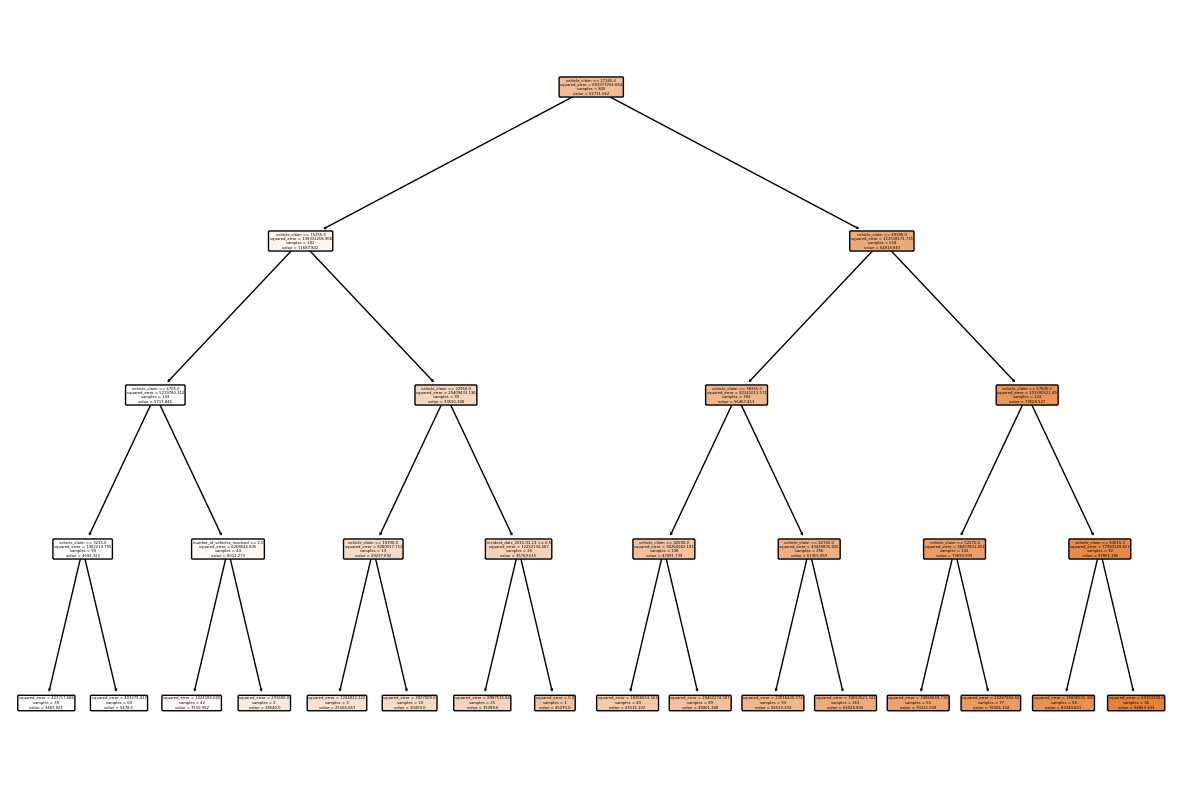

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## Feature Analysis for decision tree
In the below code, we will try to understand which features had the highest impact on the results of the decision tree model

In [ ]:
# Get the feature importances from the trained Decision Tree model
feature_importances = regressor.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame based on the importance values in descending order to get the most important features first
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top features with the highest impact
print("Top features contributing the most to the result:")
print(importance_df.head())


Top features contributing the most to the result:
                              Feature  Importance
12                      vehicle_claim    0.999390
9         number_of_vehicles_involved    0.000434
1023         incident_date_2015-01-13    0.000176
1436  incident_location_3998 Flute St    0.000000
1431   incident_location_3966 Oak Hwy    0.000000


## K-Fold Cross Validation for Decision trees

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define X (features) and y (target)
# X = df_pca_result
X= df1_encoded
y = df1['total_claim_amount']

# Number of folds for cross-validation
num_folds = 5

# Initialize lists to store cross-validation results
mse_scores = []
r2_scores = []

# Create k-fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Create and train the Decision Tree Regression model with reduced splits and max_depth
    regressor = DecisionTreeRegressor(random_state=42, min_samples_split=5, max_depth=5)
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the mean and standard deviation of the metrics
mean_mse = sum(mse_scores) / num_folds
mean_r2 = sum(r2_scores) / num_folds
std_mse = (sum((mse - mean_mse) ** 2 for mse in mse_scores) / num_folds) ** 0.5
std_r2 = (sum((r2 - mean_r2) ** 2 for r2 in r2_scores) / num_folds) ** 0.5

#print("Mean Squared Error (mean):", mean_mse)
#print("Mean Squared Error (std):", std_mse)
print("R-squared (mean):", mean_r2)
print("R-squared (std):", std_r2)


R-squared (mean): 0.9569280932065813
R-squared (std): 0.0015801080298724678


## Decision Tree Conclusion:
The model achieved a high R-squared value of approximately 0.959, indicating that it can explain about 95.9% of the variance in the total_claim_amount, which is quite good.
1. Overfitting Prevention: By using reduced splits and depth, the model's generalization capability is enhanced, reducing the risk of overfitting on the training data and improving its performance on new, unseen data. Due to the relatively small size of the dataset, it was necessary to carefully manage the complexity of the model to avoid overfitting and maintain its ability to generalize to new data points.

## Business Insights:
1. Vehicle Claim: The "vehicle_claim" feature has the highest importance in both the Decision Tree model. This indicates that the amount claimed for vehicle-related incidents plays a dominant role in determining the overall claim amount. In other words, when policyholders make claims related to their vehicles, it tends to have the most significant impact on the total claim amount.

2.  Number of Vehicles Involved: The "number_of_vehicles_involved" is another crucial feature . This suggests that the total claim amount is influenced by the number of vehicles involved in an incident. For instance, accidents involving multiple vehicles might lead to higher claim amounts due to increased damages and potential injuries.

3.  Incident Date: Surprisingly, the "incident_date" was identified as an important feature in the Decision Tree model. This indicates that the date of the incident might be associated with varying claim amounts. It's important to investigate further to understand why certain incident dates might lead to higher or lower claim amounts.

4.  Incident Location: Similarly, the "incident_location" was identified as an essential feature. The location of the incident could potentially be linked to different factors such as the severity of the incident, local regulations, or the cost of repairs, which in turn affects the total claim amount.

# Naive Bayes

In this section, we build a Naive Bayes model to predict the total claim amount classification (Low with output as "class 0" or High with output as "class 1") in the "Insurance claims" dataset.

Since Naive Bayes is a classifier method that takes binary input and output, unlike the previous algorithms that handle continuous input and output, we have made a modification to the business question we are studying. Instead of asking, "How much total claim amount do we expect this individual to have," we now inquire, "Do we expect this individual to have a low or high total claim amount?" The classification of "low" and "high" is determined based on whether it falls below or above the midpoint.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a new binary target variable based on the 50th percentile of "total_claim_amount"
threshold = df1["total_claim_amount"].quantile(0.5)
df1_encoded["binary_target"] = (df1["total_claim_amount"] >= threshold).astype(int)
# df_pca_result["binary_target"] = (df1["total_claim_amount"] >= threshold).astype(int)

# Split the data into features (X) and the new binary target (y)
X = df1_encoded.drop(columns=["binary_target"])
y = df1_encoded["binary_target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9
Confusion Matrix:
[[90 15]
 [ 5 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       105
           1       0.86      0.95      0.90        95

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



### K-fold Cross Validation for Naive Baye's

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a new binary target variable based on the 50th percentile of "total_claim_amount"
threshold = df1["total_claim_amount"].quantile(0.5)
df1_encoded["binary_target"] = (df1["total_claim_amount"] >= threshold).astype(int)

# Define X (features) and y (target)
X = df1_encoded.drop(columns=["binary_target"])
y = df1_encoded["binary_target"]

# Number of folds for cross-validation
num_folds = 5

# Initialize lists to store cross-validation results
accuracy_scores = []
confusion_matrices = []
classification_reports = []

# Create k-fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Create and train the Naive Bayes model
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = naive_bayes.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    accuracy_scores.append(accuracy)
    confusion_matrices.append(confusion)
    classification_reports.append(pd.DataFrame(classification_rep))

# Calculate the mean accuracy score across folds
mean_accuracy = sum(accuracy_scores) / num_folds
mean_confusion = sum(confusion_matrices) / num_folds

print("Mean Accuracy:", mean_accuracy)
print("Mean Confusion Matrix:")
print(mean_confusion)

# Create and print the mean classification report
mean_classification_report = pd.concat(classification_reports).groupby(level=0).mean()
print("Mean Classification Report:")
print(mean_classification_report)


Mean Accuracy: 0.898
Mean Confusion Matrix:
[[83.4 16.6]
 [ 3.8 96.2]]
Mean Classification Report:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.891127    0.903173     0.898    0.897150      0.897553
precision    0.958168    0.852757     0.898    0.905463      0.906230
recall       0.834732    0.961353     0.898    0.898042      0.898000
support    100.000000  100.000000     0.898  200.000000    200.000000


## Logging probabilities for each feature that impacted the result
The below code helps us to understand which feature has the highest impact on the result

In [ ]:
# proba_train = naive_bayes.predict_proba(X_train)

# # Assuming binary classification (class 0 and class 1)
# # Calculate the difference in predicted probabilities for each feature
# feature_contributions = proba_train[:, 1] - proba_train[:, 0]

# print(len(X_train))
# print(len(proba_train))
# print(len(feature_contributions))
# print(len(X_train.columns))
# print(len(feature_contributions))

# # Assuming feature_contributions is a NumPy array, convert it to a pandas Series
# feature_contributions_series = pd.Series(feature_contributions, name='Feature Contribution', index=X_train.columns)

# # Create the feature_importance_df DataFrame by combining feature_contributions_series and X_train.columns
# feature_importance_df = pd.DataFrame({'Feature Contribution': feature_contributions_series})

# # Print the modified DataFrame
# print(feature_importance_df)

## Naive Bayes Conclusion

The model has a high average accuracy score (averaged 89.8%). And the confusion matrix presents that the model achieved an accuracy of approximately 83.4% in correctly identifying individuals with a low claim amount (Class 0), and around 96.2% accuracy in identifying individuals with a high claim amount (Class 1). Overall, Naive Bayes model shows promising performance in predicting whether an individual is likely to have a low or high total claim amount.

Since Naive Bayes is a classifier method that operates on binary input and output, it differs from the previous algorithms designed for continuous input and output. By reframing the question from "How much total claim amount do we expect this individual to have?" to "Do we expect this individual to have a low or high total claim amount?" we are essentially simplifying the inquiry for the machine. The classification into high or low claim amounts smoothens the complexity of the question and its subsequent results. Despite this simplification, the classification remains valuable as it offers a quick and reliable approximation, serving as a valuable preliminary step before conducting more detailed and in-depth studies.

# Final conclusion for Dataset 2

Based on the analysis of the three algorithms (Linear Regression, Decision Tree, and Naive Bayes), several important conclusions can be drawn:

1. Model Performance:

  *   Linear Regression achieved a high R-squared value of approximately 0.96, indicating that it can explain approximately 96% of the variance in the total_claim_amount based on the selected features.
  *   Decision Tree also performed well, with an R-squared value of approximately 0.96, indicating that it can explain approximately 96% of the variability in the insurance claim amounts.
  *   Naive Bayes showed promising performance in binary classification, with an average accuracy of approximately 89.8%, providing a valuable approximation for predicting low and high claim amounts.

Although Naive Bayes acts as a classifier and smooths the prediction (by asking the machine an easier question), the algorithm still has limitations. It assumes that all features are independent. Given that this dataset has a total of 40 columns, it's challenging to have all features independent. On the other hand, Linear Regression and Decision Tree don't have this limitation and can capture more complexity in the data.


2. Business Insights:

  *   The analysis revealed that factors, such as incident details, vehicle claims, vehicle type, and number of vehicles involved, had a more substantial influence on claim amounts. While age, marital status, and other similar demographic features have a less significant impact on the total_claim_amount in both datasets.
  
3. Model Generalization:

  *   Both Linear Regression and Decision Tree models employed techniques to prevent overfitting (Train and testing data split, K-fold cross validation), resulting in better generalization to new data. The scores are more reliable.


4. Further Possible Investigations:

  *   Future studies might focus on identifying characteristics of car models associated with lower claim amounts to discover patterns and potential cost-saving opportunities.



In conclusion, the three algorithms each provided valuable insights and predictions for the auto insurance claim amounts. Linear Regression and Decision Tree highlighted the importance of incident details and location, while Naive Bayes offered a practical classification approach. The findings from these models can be utilized to optimize insurance pricing strategies and better understand the factors affecting claim amounts. Further investigations and continuous improvements in model performance can lead to more accurate and efficient insurance claim predictions, ultimately benefiting both insurers and policyholders.

# Final Conclusion for the Project

When conducting a comparative analysis of various algorithms on each dataset, a clear trend emerges, highlighting Naive Bayes as the top performer.

Naive Bayes, a binary classification model, excels in predicting discrete binary outcomes, specifically True or False. This problem type lends itself well to the model's learning process, resulting in enhanced accuracy. In contrast, regression models with continuous inputs and outputs pose more complexity, making binary classification an advantageous approach for the machine. Our data exploration confirms this, as weak correlations between features in both datasets align harmoniously with the assumptions of Naive Bayes.

As for Linear Regression, it exhibits a slightly weaker performance, particularly in dataset 1. This is attributed to its limitation in capturing only linear relationships and its inability to handle more intricate patterns.

The comprehensive analysis of these two datasets using diverse algorithms, including Naive Bayes, Decision Tree, and Linear Regression, furnishes invaluable insights for optimizing insurance offerings and refining claim predictions.


Our analysis of the two datasets revealed that certain features related to the policyholder do not significantly impact the prediction of claim amounts. However, information about the vehicle, such as its price and brand, and details about the accident, including the type, time, and cars involved, have a stronger influence on claim predictions.

Another interesting insight is, Contrary to popular belief, sports cars have fewer claims, possibly because they are driven by enthusiasts who take extra care and use them primarily for recreational purposes. The focus on performance and handling, along with advanced safety features, might contribute to lower claim amounts.

An essential aspect to consider is the causation relationship between variables. For instance, in dataset 1, the "monthly premium" field appeared to be a strong predictor of claim amounts. However, it is crucial to exercise caution when using it to predict current year claim amounts, as premiums are often determined based on the policyholders' past claim amounts. Consequently, this requires a thorough examination of the model assumptions, particularly for long-term predictions, similar to time-series forecasting.

Furthermore, we observed that car make and model can be informative in predicting claim amounts. Since the market offers a wide variety of cars and models, conducting separate studies on vehicles can yield more generalized insights beyond the scope of the "brand" and "car model" variables used in this project. For instance, understanding car features associated with higher claims could be beneficial in risk assessment.

For insurance companies, the business insights derived from the analysis suggest focusing on collecting information solely on the more critical features that impact the target class being predicted. Establishing underwriting criteria based on these important features can lead to better risk management and improved budgeting for the company, ultimately enhancing overall performance and efficiency.


In [ ]:
#End of file